In [62]:
import pandas as pd


tourism = pd.read_csv('tourism.csv')

<Axes: >

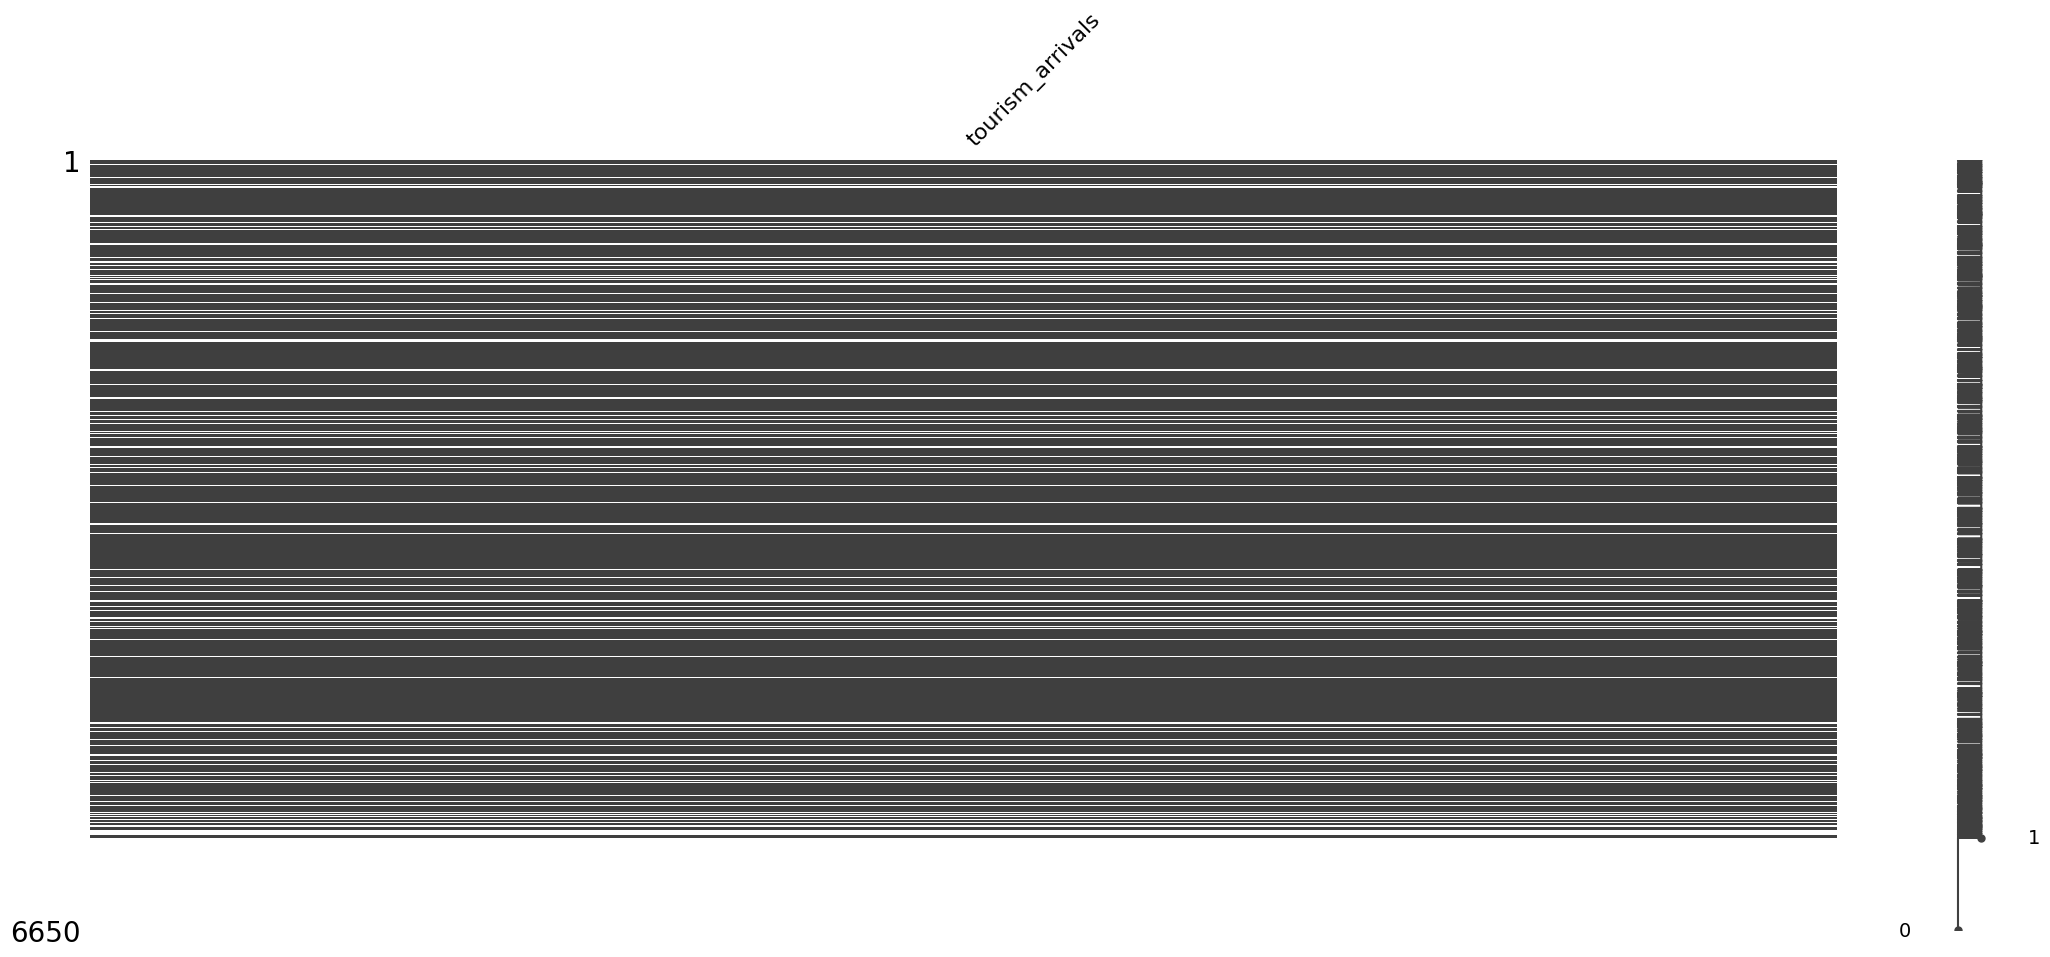

In [63]:
import missingno as msno
msno.matrix(tourism[['tourism_arrivals']])

ABW — Missing rows to fill: 4
AFE — Missing rows to fill: 4
AFG — Missing rows to fill: 25
AFW — Missing rows to fill: 7
AGO — Missing rows to fill: 4
ALB — Missing rows to fill: 3
AND — Missing rows to fill: 3
ARB — Missing rows to fill: 9
ARE — Missing rows to fill: 19
ARG — Missing rows to fill: 4
ARM — Missing rows to fill: 3
ASM — Missing rows to fill: 6
ATG — Missing rows to fill: 3
AUS — Missing rows to fill: 3
AUT — Missing rows to fill: 3
AZE — Missing rows to fill: 3
BDI — Missing rows to fill: 6
BEL — Missing rows to fill: 3
BEN — Missing rows to fill: 6
BFA — Missing rows to fill: 3
BGD — Missing rows to fill: 4
BGR — Missing rows to fill: 3
BHR — Missing rows to fill: 3
BHS — Missing rows to fill: 3
BIH — Missing rows to fill: 3
BLR — Missing rows to fill: 4
BLZ — Missing rows to fill: 3
BMU — Missing rows to fill: 3
BOL — Missing rows to fill: 3
BRA — Missing rows to fill: 4
BRB — Missing rows to fill: 4
BRN — Missing rows to fill: 12
BTN — Missing rows to fill: 3
BWA — M

<Axes: >

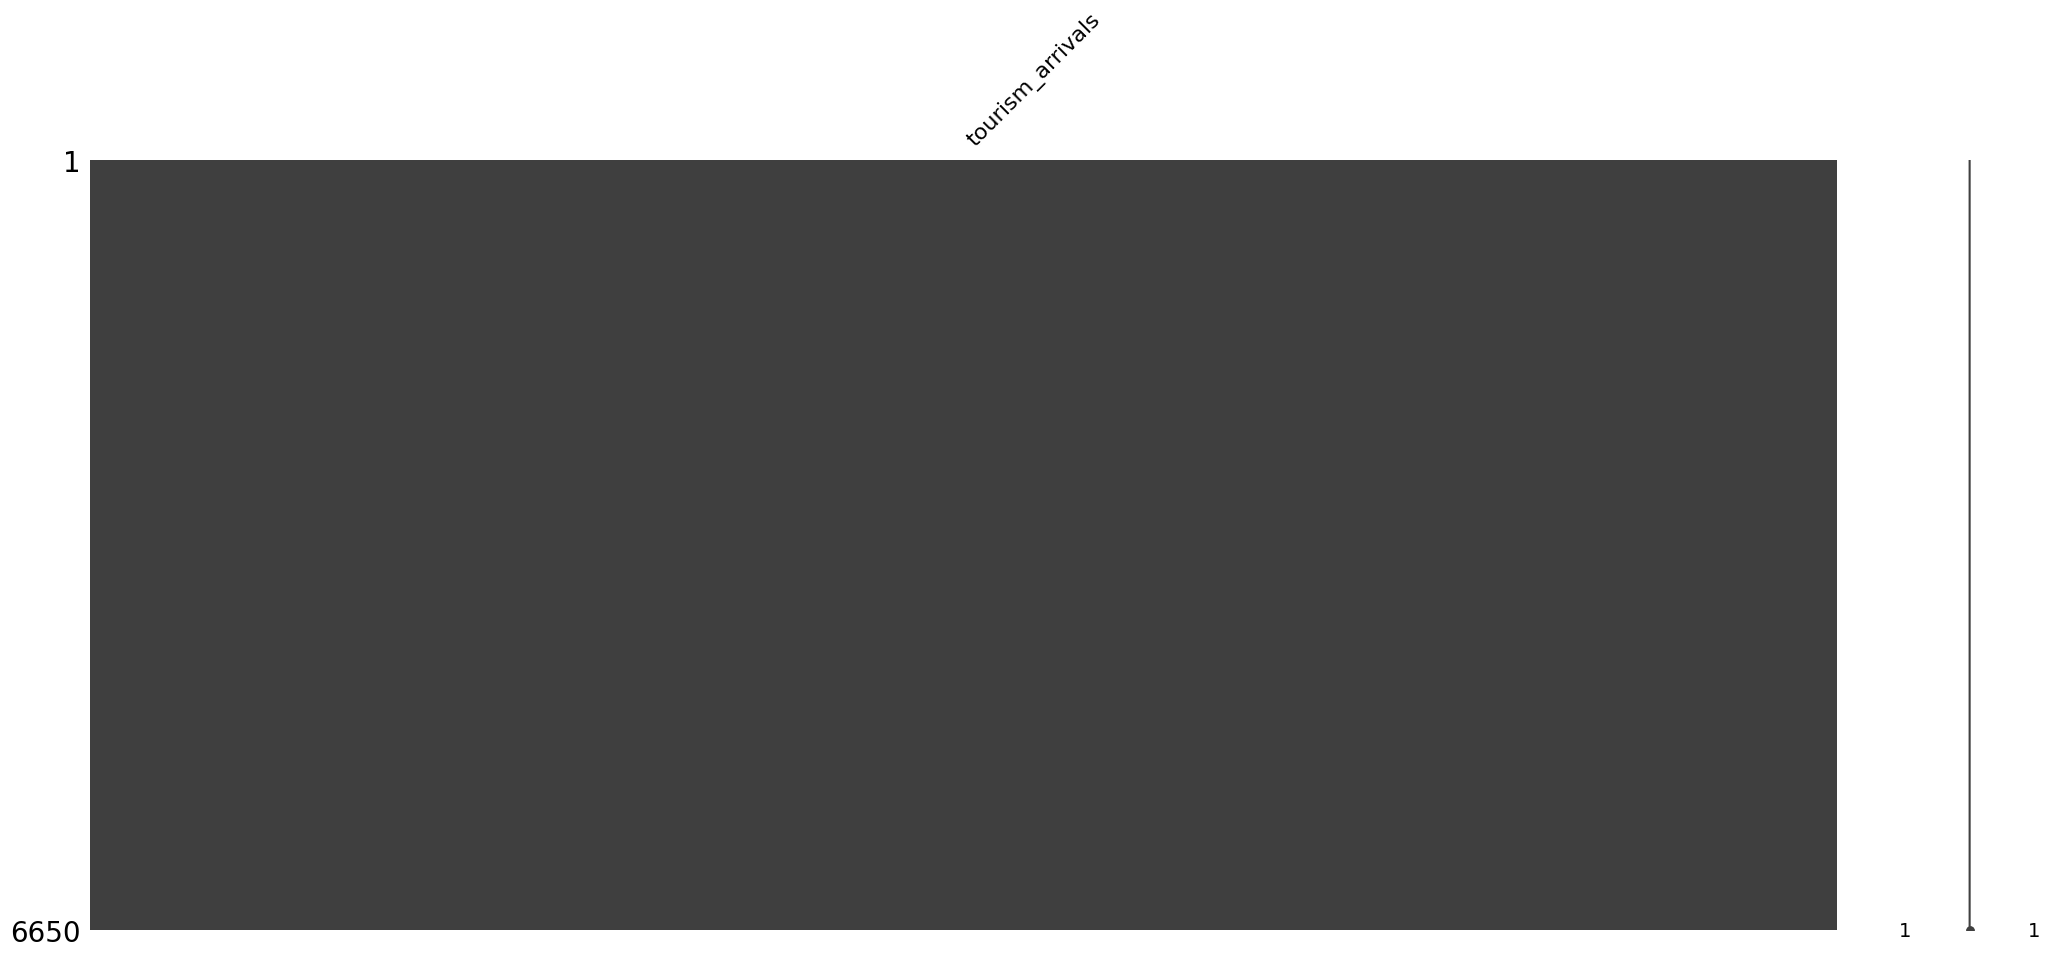

In [64]:
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
countries = tourism['country_code'].unique()
for country in countries:
    missing = tourism['tourism_arrivals'].isna()
    present = ~missing

    X = tourism.loc[present, 'year'].values.reshape(-1,1)
    Y = tourism.loc[present, 'tourism_arrivals'].values

    if Y.shape[0] <= 0:
        continue

    model = LinearRegression()
    model.fit(X,Y)

    naRows = (tourism['tourism_arrivals'].isna()) & (tourism['country_code'] == country)
    print(f"{country} — Missing rows to fill: {naRows.sum()}")

    if naRows.sum() > 0:
        missing_years = tourism.loc[naRows, 'year'].values.reshape(-1, 1)
        tourism.loc[naRows, 'tourism_arrivals'] = model.predict(missing_years)

msno.matrix(tourism[['tourism_arrivals']])

In [66]:
tourism[tourism['country_code'] == 'CHI']['tourism_arrivals'].value_counts()

tourism_arrivals
4.781984e+07    1
4.923816e+07    1
5.065647e+07    1
5.207479e+07    1
5.349311e+07    1
5.491142e+07    1
5.632974e+07    1
5.774805e+07    1
5.916637e+07    1
6.058468e+07    1
6.200300e+07    1
6.342132e+07    1
6.483963e+07    1
6.625795e+07    1
6.767626e+07    1
6.909458e+07    1
7.051290e+07    1
7.193121e+07    1
7.334953e+07    1
7.476784e+07    1
7.618616e+07    1
7.760448e+07    1
7.902279e+07    1
8.044111e+07    1
8.185942e+07    1
Name: count, dtype: int64

In [ ]:
#carlos, assuming data in df called tourism
tourism = pd.read_csv('tourism.csv')
# see missing values
import missingno as msno
msno.matrix(tourism[['tourism_arrivals']])
# now run regression by country based on year
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
countries = tourism['country_code'].unique()
for country in countries:
    missing = tourism['tourism_arrivals'].isna()
    present = ~missing

    X = tourism.loc[present, 'year'].values.reshape(-1,1)
    Y = tourism.loc[present, 'tourism_arrivals'].values

    if Y.shape[0] <= 0:
        continue

    model = LinearRegression()
    model.fit(X,Y)

    naRows = (tourism['tourism_arrivals'].isna()) & (tourism['country_code'] == country)
    print(f"{country} — Missing rows to fill: {naRows.sum()}")

    if naRows.sum() > 0:
        missing_years = tourism.loc[naRows, 'year'].values.reshape(-1, 1)
        tourism.loc[naRows, 'tourism_arrivals'] = model.predict(missing_years)
# now recheck missing rows
msno.matrix(tourism[['tourism_arrivals']])
